# Final Project - ASTP-720 - Brendan Drachler

# Calculating the Hubble Constant, $H_o$ 

This notebook contains all of the work needed to calculate $H_o$. 

Note: This notebook doesn't cover the the meaning of $H_o$ or the reason we care about finding its true value. For that, reference the paper in this repository. 

In [1]:
## Import packages and data extraction/fitting files.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from data_extraction import read_dataset
from curve_fitting import least_squares
from curve_fitting import MCMC

## After importing functions, change directories to be in the data directory. This make data access easier.

In [2]:
cd data/

/Users/brendandrachler/Documents/Comp_Astrophysics_ASTP720/Final_Project/data


## Read in the datasets! 

For an more in-depth description of each dataset, see dataset_information.txt

In [3]:
type_1a = read_dataset('type_1a.txt')
SDSS = read_dataset('SDSS_lum_distance_cepheids.csv')
leda = read_dataset('leda_distance.csv')

# Plot the data in each dataset!

Text(0.5, 1.0, 'Recessional Velocity of Galaxies in the Type 1a Supernova Dataset')

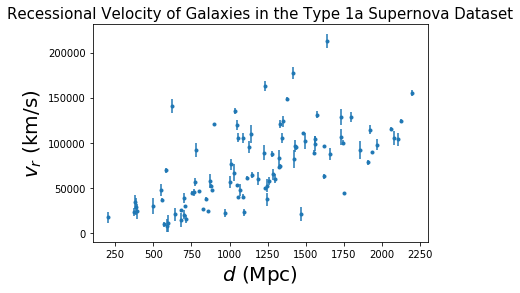

In [4]:
plt.errorbar(type_1a[0], type_1a[2], yerr=type_1a[3], fmt='.')
plt.ylabel(r'$v_r$ (km/s)', size=20)
plt.xlabel(r'$d$ (Mpc)', size=20)
plt.title(r'Recessional Velocity of Galaxies in the Type 1a Supernova Dataset', size=15)

Text(0.5, 1.0, 'Recessional Velocity of Galaxies in the SDSS Dataset')

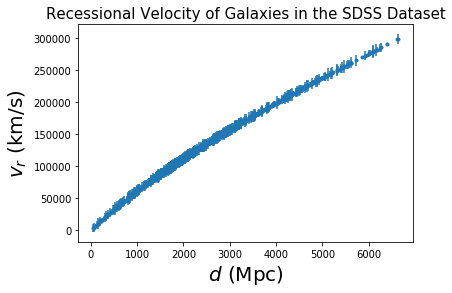

In [5]:
#SDSS[0], SDSS[2] = (list(t) for t in zip(*sorted(zip(SDSS[0], SDSS[2]))))
plt.errorbar(SDSS[0], SDSS[2], yerr=SDSS[3], fmt='.')
plt.ylabel(r'$v_r$ (km/s)', size=20)
plt.xlabel(r'$d$ (Mpc)', size=20)
plt.title(r'Recessional Velocity of Galaxies in the SDSS Dataset', size=15)

Text(0.5, 1.0, 'Recessional Velocity of Galaxies in the HyperLeda Dataset')

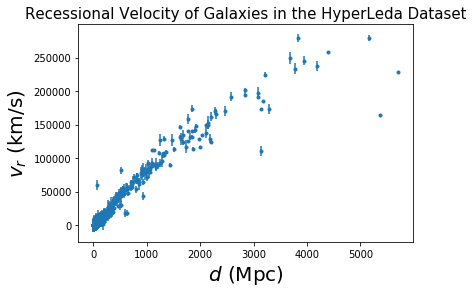

In [6]:
plt.errorbar(leda[0], leda[2], yerr=leda[3], fmt='.')
plt.ylabel(r'$v_r$ (km/s)', size=20)
plt.xlabel(r'$d$ (Mpc)', size=20)
plt.title(r'Recessional Velocity of Galaxies in the HyperLeda Dataset', size=15)

# Perform a Least Squares Fit

We are fitting a model of the form y = param[0] * x + param[1] to each of these datasets. 

In [7]:
lst_sol_type_1a = least_squares(type_1a[0], type_1a[2])
lst_sol_SDSS = least_squares(SDSS[0], SDSS[2])
lst_sol_leda = least_squares(leda[0], leda[2])
print(lst_sol_type_1a, lst_sol_SDSS, lst_sol_leda)

[  57.63587467 6326.43891908] [   44.64642011 19993.71423929] [ 62.97767891 701.17845909]


# Visualize each fit!

Text(0.5, 1.0, 'Recessional Velocity of Galaxies in the Type 1a Supernova Dataset')

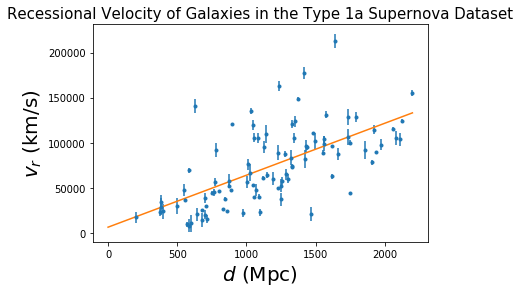

In [8]:
x_space = np.linspace(0, np.max(type_1a[0]), 1000)

plt.errorbar(type_1a[0], type_1a[2], yerr=type_1a[3], fmt='.')
plt.plot(x_space, lst_sol_type_1a[0] * x_space + lst_sol_type_1a[1])
plt.plot()
plt.ylabel(r'$v_r$ (km/s)', size=20)
plt.xlabel(r'$d$ (Mpc)', size=20)
plt.title(r'Recessional Velocity of Galaxies in the Type 1a Supernova Dataset', size=15)

Text(0.5, 1.0, 'Recessional Velocity of Galaxies in the SDSS Dataset')

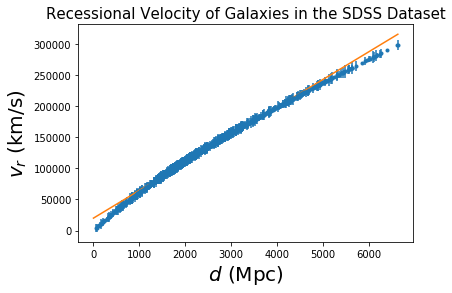

In [9]:
x_space = np.linspace(0, np.max(SDSS[0]), 1000)

plt.errorbar(SDSS[0], SDSS[2], yerr=SDSS[3], fmt='.')
plt.plot(x_space, lst_sol_SDSS[0] * x_space + lst_sol_SDSS[1])
plt.ylabel(r'$v_r$ (km/s)', size=20)
plt.xlabel(r'$d$ (Mpc)', size=20)
plt.title(r'Recessional Velocity of Galaxies in the SDSS Dataset', size=15)

Text(0.5, 1.0, 'Recessional Velocity of Galaxies in the HyperLeda Dataset')

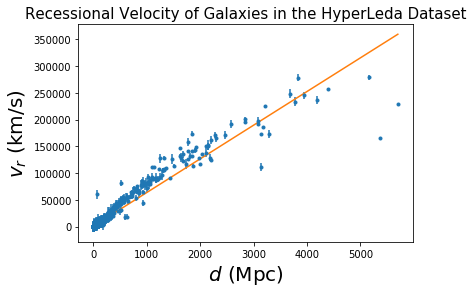

In [10]:
x_space = np.linspace(0, np.max(leda[0]), 1000)

plt.errorbar(leda[0], leda[2], yerr=leda[3], fmt='.')
plt.plot(x_space, lst_sol_leda[0] * x_space + lst_sol_leda[1])
plt.ylabel(r'$v_r$ (km/s)', size=20)
plt.xlabel(r'$d$ (Mpc)', size=20)
plt.title(r'Recessional Velocity of Galaxies in the HyperLeda Dataset', size=15)

These datasets do not do very well at predicting $H_o$. That is likely due to the compounding uncertainty at large distances. Therefore, it might be worth trying to compute $H_o$ for closer galaxies. 

# MCMC on a subset of the dataset

I will use a subset of each dataset that is closest to Earth. 

In [38]:
sampler_type1a = MCMC(50, 2, 2000, [50,3000], type_1a[0][:30], type_1a[2][:30], np.var(type_1a[2][:30]))
sampler_SDSS = MCMC(50, 2, 2000, [50,3000], SDSS[0][:500], SDSS[2][:500], np.var(SDSS[2][:300]))
sampler_leda = MCMC(50, 2, 2000, [50,3000], leda[0][:2000], leda[2][:2000], np.var(leda[2][:2000]))

100%|██████████| 2000/2000 [00:04<00:00, 477.71it/s]


## Type 1a Dataset

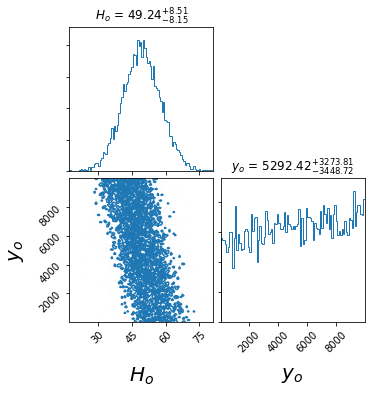

In [48]:
import corner
flat_samples = sampler_type1a[0].get_chain(discard=100, thin = 15, flat=True)
fig = corner.corner(flat_samples,bins=100,color='C0',smooth=0.01,plot_datapoints=False,plot_density=True,plot_contours=True,fill_contour=False,show_titles=True,labels=[r'$H_o$',r'$y_o$'],label_kwargs=dict(fontsize=20))



## SDSS Dataset

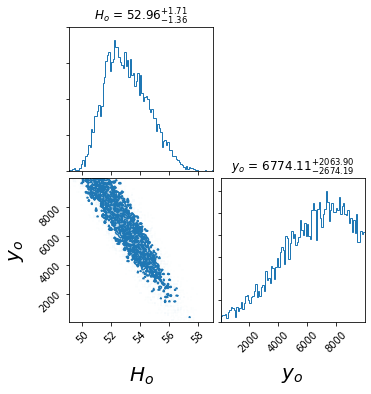

In [49]:
import corner
flat_samples = sampler_SDSS[0].get_chain(discard=100, thin = 15, flat=True)
fig = corner.corner(flat_samples,bins=100,color='C0',smooth=0.01,plot_datapoints=False,plot_density=True,plot_contours=True,fill_contour=False,show_titles=True,labels=[r'$H_o$',r'$y_o$'],label_kwargs=dict(fontsize=20))




## HyperLeda Dataset

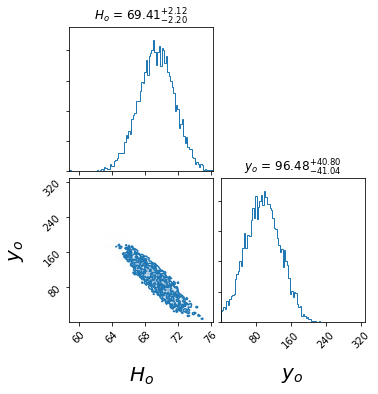

In [50]:
import corner
flat_samples = sampler_leda[0].get_chain(discard=100, thin = 15, flat=True)
fig = corner.corner(flat_samples,bins=100,color='C0',smooth=0.01,plot_datapoints=False,plot_density=True,plot_contours=True,fill_contour=False,show_titles=True,labels=[r'$H_o$',r'$y_o$'],label_kwargs=dict(fontsize=20))



The HyperLeda dataset performs very well because most literature suggests the true value of $H_o$ lies in the range of 67-73 - more about that in the paper associated with this notebook. What if we include all the data?

In [51]:
sampler_leda = MCMC(50, 2, 2000, [50,3000], leda[0], leda[2], np.var(leda[2]))

100%|██████████| 2000/2000 [00:05<00:00, 369.90it/s]


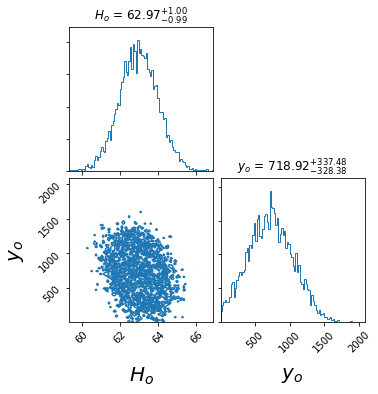

In [52]:
import corner
flat_samples = sampler_leda[0].get_chain(discard=100, thin = 15, flat=True)
fig = corner.corner(flat_samples,bins=100,color='C0',smooth=0.01,plot_datapoints=False,plot_density=True,plot_contours=True,fill_contour=False,show_titles=True,labels=[r'$H_o$',r'$y_o$'],label_kwargs=dict(fontsize=20))


The entirety of the dataset doesn't perform nearly as well. This is likely an indication that our estimates of the distance to objects at larger distances are wrong!